In [11]:
import os
import subprocess
import pandas as pd
import numpy as np

In [ ]:
#lists all the files in the directory

#57 potenbtially problematic due to double files...

dicti_r={}
for nu in range(1,61):
    filenames_filt=[]
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu))
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)

    for filename in filenames_filt:
       with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu), filename), 'r') as f: # open in readonly mode
          # do your stuff
            f_l=f.readlines()
            #means at least one ribo was found
            if len(f_l)>17:
                for linea in f_l[11:-6]:
                    if linea[0]!="|":
                        #line=linea.replace(".","_")
                        line=linea.strip().split()
                        try:
                            if line[2] in dicti_r:
                                dicti_r[line[2]].append(int(line[0]))
                            else:
                                dicti_r[line[2]]=[int(line[0])]
                        except: 
                            print("duplicated but why")




duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated b

In [6]:
# so it looks like sometimes the ronarobo results get duplicated, and that in turn leads to trnascan to run wild-> how to fix

7

In [3]:
filename

'SRR1966467_rnarobo_result.txt'

In [5]:
len(dicti_r)
#Yay

104264

In [6]:
#to create dicti of all trnascan files
dicti={}
for nu2 in range(1,61):
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2))
    filenames_filt=[]
 
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)
    for filename in filenames_filt:
        #with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v3_T/trnascan/"+str(nu), filename), 'r') as f: # open in readonly mode
            f=open("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2)+"/"+filename, 'r')
           
          # do your stuff
            f_l=f.readlines()
         
            #means at least one ribo was found
            if len(f_l)>1:
                for line in f_l[3:]:
                #create a dictionary with seq name as key and the starting position as value
                    line=line.strip().split()
                    #line[0]=line[0].replace(".","_")
                    if line[0] in dicti:
                        dicti[line[0]].append(int(line[3]))
                    else:
                        dicti[line[0]]=[int(line[3])]
                    

In [36]:
rs_s[4].strip().split()

['SRR1612320.1975633', '1', '7', '78', 'Sup', 'CTA', '0', '0', '60.8']

In [7]:
matching=[]
for key in dicti_r:
    if key in dicti:
        for value in dicti_r[key]:
            for value2 in dicti[key]:
                if value-value2 in range(-5,5):
                    matching.append([key,value,value2])

In [8]:
newm=matching

In [ ]:
#lets create the dataframe with all hits

In [12]:
lets_do_this=pd.DataFrame(columns=["ID","trna_nr","trna_start","trna_end","trna_type","codon","ins_start","ins_end","trna_confidence","psuedo","rnarobo_start","rnarobo_end","rnarobo_seq"])
check=0
oldn=""
duplicates=[]
for nr in range(len(newm)):
    #check: if old filename is still the same
    match=newm[nr]
    lin_df=""
    if match[0]!=oldn:
        
        
        trnaf=open("../phage_samples/v4/together/"+match[0].split(".")[0]+"trna_result.txt")
        trna=trnaf.readlines()
        trnaf.close()
        
        rnarobof=open("../phage_samples/v4/together/"+match[0].split(".")[0]+"_rnarobo_result.txt")
        rnarobo=rnarobof.readlines()
        rnarobof.close()
        
        
        
        
    for line in trna[3:]:
        
    #create a dictionary with seq name as key and the starting position as value
        line=line.strip().split()
        
        if match[0]==line[0]:
            if len(lin_df.split())==0:
                if str(match[2])==line[3]:
                    #print(line)
                    lin_df+=" ".join(line)+" "
                    if lin_df[-2]!="o":
                        lin_df+="NA "
            else: 
                duplicates.append(line)    
    
    for line in rnarobo[11:-6]:
        #fix 1: we don't need this here!
        #line=line.replace(".","_")
        line=line.strip().split()
        if len(lin_df.split())<13:

            if check==1:
                #if len(lin_df.split())<13:
                    lin_df+=str(line[0])
                    check=0
                #else:
                        #duplicates.append(line)

                #check=0
                
            #####FIX 2: Important here: we did this to make sure that we are actually matching the right ribozyme here...
            if len(line)>1:
                #here we made the mistake: not checking the actual ID but only starting position
                if match[0]==line[2]:
                    if str(match[1])==line[0]:
                    #if len(lin_df.split())<13:
                        lin_df+=" ".join(line[:2])
                        lin_df+=" "
                        check=1
                #else:
                #duplicates.append(line)
                #check=0
    
    #change to 4: CORRECT
   
    
    oldn=match[0]
    lin_f=lin_df.split()
    lets_do_this.loc[nr]=np.array(lin_f)
    
    #lets_do_this.iloc[nr,:8]=lin_df[0]
    #lets_do_this.iloc[nr,8:-1]=lin_df[1]
    #lets_do_this.iloc[nr,-1]=lin_df[2]

In [13]:
fff=lets_do_this

In [14]:
fff.iloc[5:]

,ID,trna_nr,trna_start,trna_end,trna_type,codon,ins_start,ins_end,trna_confidence,psuedo,rnarobo_start,rnarobo_end,rnarobo_seq
5,ERR2597485.4646148,1,301,216,Leu,TAA,0,0,59.8,NA,215,161,|GAATAGC|AA|ATGAGAA|ACC|T|CC|ACGT|GGT|GCTATTC|...
6,ERR2597485.5158749,1,135,204,Ile,TAT,0,0,21.3,pseudo,205,261,|GATTCTC|AAA|GCCTTTT|ACC|T|CC|ACGT|GGT|GAGAATC...
7,ERR2597485.5774728,1,164,237,Glu,TTC,0,0,46.0,NA,238,293,|GGAATGT|AAT|TCTTGCA|ACC|T|CC|ACGT|GGT|ACATTCT...
8,ERR2597485.6098813,1,1,66,Sup,CTA,0,0,39.9,NA,70,125,|GAATAGC|GTA|AGTAGAA|ACC|T|CC|ACGT|GGT|GCTATTC...
9,ERR2597485.6183304,1,145,214,Sup,CTA,0,0,24.5,NA,213,268,|GAATAGC|GTA|AGTAGAA|ACC|T|CC|ACGT|GGT|GCTATTC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12153,SRR1522982.2622580,1,111,182,Sup,CTA,0,0,58.4,NA,183,238,|GAATAGC|GTA|AGTAGAA|ACC|T|CC|ACGT|GGT|GCTATTC...
12154,SRR1522982.4111288,1,147,63,Ser,GCT,0,0,39.6,NA,60,4,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...
12155,SRR1522982.4750961,1,91,181,Ser,GCT,0,0,51.2,NA,184,240,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...
12156,SRR1522982.5505649,1,102,192,Ser,GCT,0,0,51.0,NA,195,251,|GGAATAC|GTG|ATATTCA|ACC|T|CC|TCGT|GGT|GTATTCT...


In [15]:
y=fff["trna_type"].value_counts()

In [178]:
plt.rcParams["figure.figsize"] = (20,10)

<BarContainer object of 22 artists>

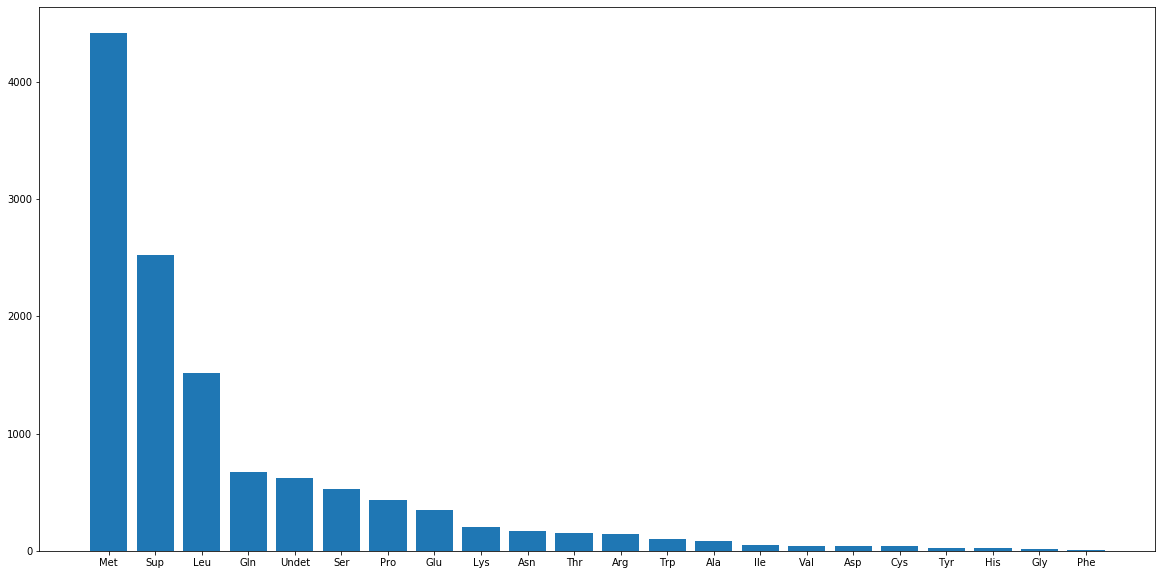

In [179]:
plt.bar(range(22),y,tick_label=y.index)


In [16]:
fff["trnaseq"]= " "

fff["ribozyme_control"]= " "

In [ ]:
# add the trna sequences
#now we have the problem that we have different formats in the files: some have only one line for seuence, others multiple

In [31]:
#lets try to save and cut out the respective trnas (and in between part)
check=0
for ID in range(len(fff)):
    match=fff.iloc[ID,0]
    rnarobof=open("../phage_samples/v4/together/"+match.split(".")[0]+"_seqs_rnarobo_result.txt")
    rnarobo=rnarobof.readlines()
    rnarobof.close()
    #inp="grep -A1 -m1 "+fff.iloc[ID,0]+" mgv_contigs.fna" 
    #res=subprocess.run(inp,shell=True, capture_output=True, text=True)
    sequ=""
    for num in rnarobo:
        
        if num[0]==">":
            check=0
        #in this order it automatecely selects the sequence after matching
        if check==1:
            sequ+=num.strip()
            #check=0
            #exclude the ">" of the fasta file
        if match==num.split(" ")[0][1:]:
            check=1

        #sequ=res.stdout.split()[-1]
    check=0
    start=int(fff.iloc[ID,2])-1
    end=int(fff.iloc[ID,3])
    start2=int(fff.iloc[ID,10])-1
    end2=int(fff.iloc[ID,11])
    if start < end:
        trna=sequ[start:end]
        rnarobo=sequ[start2:end2]
        fff.iloc[ID,-2]=trna
        fff.iloc[ID,-1]=rnarobo
    if end < start:
        #reverse sequence: add +1 to reverse previous indexing correction 
        end-=1
        start+=1
        end2-=1
        start2+=1
        trna_rev=sequ[end:start]
        ribo_rev=sequ[end2:start2]
        trna=[]
        rnarobo=[]
        #reverse parts: transcribe back into the correct format!
        for nuc in range(len(trna_rev)-1,-1,-1):
            if trna_rev[nuc]=="A":
                trna.append("T")
            if trna_rev[nuc]=="T":
                trna.append("A")
            ####here we also added the N option, qhich is superrare but possible nontheless
            if trna_rev[nuc]=="N":
                trna.append("N")
            if trna_rev[nuc]=="G":
                trna.append("C")
            if trna_rev[nuc]=="C":
                trna.append("G")
        for nuc in range(len(ribo_rev)-1,-1,-1):
            if ribo_rev[nuc]=="A":
                rnarobo.append("T")
            if ribo_rev[nuc]=="T":
                rnarobo.append("A")
            if ribo_rev[nuc]=="G":
                rnarobo.append("C")
            if ribo_rev[nuc]=="C":
                rnarobo.append("G")
            if ribo_rev[nuc]=="N":
                rnarobo.append("N")
        trna="".join(trna)
        rnarobo="".join(rnarobo)
        fff.iloc[ID,-2]=trna
        fff.iloc[ID,-1]=rnarobo
        """
    else:
        resolved_taxname=fff.iloc[ID,0].replace("sp__","sp._")
        inp="grep -A1 -m1 "+resolved_taxname+" ../1/CHVD_clustered_mash99_v1.fasta" 
        res=subprocess.run(inp,shell=True, capture_output=True, text=True)
        sequ=res.stdout.split()[-1]
        start=fff.iloc[ID,2]-1
        end=fff.iloc[ID,3]
        start2=fff.iloc[ID,10]-1
        end2=fff.iloc[ID,11]
        if start < end:
            trna=sequ[start:end]
            rnarobo=sequ[start2:end2]
            fff.iloc[ID,-2]=trna
            fff.iloc[ID,-1]=rnarobo
        if end < start:
            #reverse sequence: add +1 to reverse previous indexing correction 
            end-=1
            start+=1
            end2-=1
            start2+=1
            trna_rev=sequ[end:start]
            ribo_rev=sequ[end2:start2]
            trna=[]
            rnarobo=[]
            #reverse parts: transcribe back into the correct format!
            for nuc in range(len(trna_rev)-1,-1,-1):
                if trna_rev[nuc]=="A":
                    trna.append("T")
                if trna_rev[nuc]=="T":
                    trna.append("A")
                if trna_rev[nuc]=="G":
                    trna.append("C")
                if trna_rev[nuc]=="C":
                    trna.append("G")
            for nuc in range(len(ribo_rev)-1,-1,-1):
                if ribo_rev[nuc]=="A":
                    rnarobo.append("T")
                if ribo_rev[nuc]=="T":
                    rnarobo.append("A")
                if ribo_rev[nuc]=="G":
                    rnarobo.append("C")
                if ribo_rev[nuc]=="C":
                    rnarobo.append("G")
            trna="".join(trna)
            rnarobo="".join(rnarobo)
            fff.iloc[ID,-2]=trna
            fff.iloc[ID,-1]=rnarobo
            
        #output[-1][seq_beginning,seq_end]
        #but what with the inverted ones? :/ I guess we can change them post this by inverting and changing
        """

In [ ]:
se

In [32]:
#check if the control and actual seq are the same
for x in range(len(fff)):
    seq1=fff.loc[x,"rnarobo_seq"]
    seq3="".join(seq1.split("|"))
    seq2=fff.loc[x,"ribozyme_control"]
    if seq2!=seq3:
        print("something wrong",x)
        print(seq2)
        print(seq3)

something wrong 9499

GGTGCCATGAGAGAAGCCTGCACGCGGCGGCACTGCTTTAACTGATTCTCTC


In [33]:
#wrong way
fff.iloc[9499:9500,:]

,ID,trna_nr,trna_start,trna_end,trna_type,codon,ins_start,ins_end,trna_confidence,psuedo,rnarobo_start,rnarobo_end,rnarobo_seq,trnaseq,ribozyme_control
9499,SRR7141503.13486898,1,196,100,Pro,TGG,0,0,19.5,pseudo,98,149,|GGTGCC|AT|GAGAGAA|GCC|T|GC|ACGC|GGC|GGCACT|GC...,TAGCGCAGCTGGTAGAGCGCGTGATTTGGGATCACGAGGTCGTGAG...,


In [180]:
fff.iloc[0,13]

'GCGTGACAGGCCTAGCTCGTCAGTCTCATAAACTGAAGGTCTCTGGTTCAAGTCCAGAACCCGCA'

In [34]:
df1str=fff.to_csv(sep="\t",index=False)
f= open("all_WGS_ribo_trna_fix_feb23.csv","w+")
f.write(df1str)
f.close()

In [ ]:
#check the environments in which the hits are found

In [75]:
import random
import feather
import os
import matplotlib.pyplot as plt
import subprocess


In [3]:

import h5py
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix

def read_mapdb_h5(h5_path, otu_data=True, meta_data=True):
    """Example file: /mnt/mnemo3/janko/data/microbe_atlas/sruns-otus.97.otutable_plusMetaNoHeader_taxonomy_unmapped.h5"""
    f = h5py.File(h5_path, 'r')
    result_dict = {}

    # read otu data
    if otu_data:
        data_handle = f["otu_table"]
        col_ptr, nzvals, rowindices, otu_index, sample_index = [np.array(data_handle[sub_key]) for sub_key in ['data_colptr', 'data_nzval', 'data_rowval', 'oids', 'sids']]

        ## correct indexing (julia starts at 1)
        col_ptr -= 1
        rowindices -= 1

        otutable_sparse = csc_matrix((nzvals,rowindices,col_ptr), shape=(data_handle["m"][()],data_handle["n"][()]))
        result_dict["otu_data"] = {"otu_table": otutable_sparse, "otu_index": otu_index, "sample_index": sample_index}

    # read meta data
    if meta_data:
        meta_handle = f["meta_data"]
        result_dict["meta_data"] = {sub_key: pd.DataFrame(np.array(meta_handle[sub_key]).T) for sub_key in meta_handle.keys()}

    f.close()

    return result_dict



In [4]:
#select OTU level here: in This case 99%
f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/metag_minfilter/samples-otus.99.metag.minfilter.remap.h5")

In [46]:
#select OTU level here: in This case 97, not filtered%
f1=read_mapdb_h5("/mnt/mnemo3/janko/data/microbe_atlas/hdf5/v0.2.2/samples-otus.97.mapped.remap.h5")

In [149]:
jankos_env=pd.read_csv("/mnt/mnemo4/microbeatlas/mapdata/202/samples.env.janko",sep="\t")

In [47]:
keyw=f1["meta_data"]["keywords"]

In [154]:
wgs=keyw[keyw[3]=="WGS"]

In [156]:
for x in ["animal","soil","aquatic","plant"]:
    print(x +" found in "+str(len(wgs[wgs[1]==x]))+" samples")

animal found in 113622 samples
soil found in 2617 samples
aquatic found in 1827 samples
plant found in 4344 samples


In [48]:

samples=[]
for x in matching:
    samples.append(x[0].split(".")[0])

In [49]:
allspls=keyw.loc[:,0].str.split(".")

ind=[]
for x in allspls:
    ind.append(x[0])



['SRR6764573', 'SRS2992533']

In [50]:
keyw_2=keyw

keyw_2.index=ind

In [52]:
envs=[]
for sa in samples:
    try:
        envs.append(keyw_2.loc[sa,1])
    except:
        print(sa+" not found")

SRR5007456 not found


In [57]:
animal=0
soil=0
aquatic=0
plant=0
for env in envs:
    if "animal" in env:
        animal+=1
    elif "soil" in env:
        soil+=1
    elif "aquatic" in env:
        aquatic+=1
    elif "plant" in env:
        plant+=1

In [59]:
print("animal: "+str(animal)+" \nsoil: "+str(soil)+" \naquatic: "+str(aquatic)+" \nplant: "+str(plant))

animal: 9528 
soil: 155 
aquatic: 758 
plant: 2


In [68]:
samples2=[]
for x in dicti_r.keys():
    samples2.append(x.split("_")[0])

envs=[]
for sa in samples2:
    try:
        envs.append(keyw_2.loc[sa,1])
    except:
        print(sa+" not found")

SRR5007456 not found
ERR2113684 not found
ERR2113684 not found


In [161]:
len(set(samples2))

5945

In [69]:
animal=0
soil=0
aquatic=0
plant=0
for env in envs:
    if "animal" in env:
        animal+=1
    elif "soil" in env:
        soil+=1
    elif "aquatic" in env:
        aquatic+=1
    elif "plant" in env:
        plant+=1

In [70]:
print("animal: "+str(animal)+" \nsoil: "+str(soil)+" \naquatic: "+str(aquatic)+" \nplant: "+str(plant))

animal: 82594 
soil: 2744 
aquatic: 5777 
plant: 25


In [ ]:
#figure out how to get them into a nice table- the ones with an associated trna atleast




In [73]:
newm[3]

['ERR2597485_3043579', 227, 231]

In [55]:
lets_do_this=pd.DataFrame(columns=["ID","trna_nr","trna_start","trna_end","trna_type","codon","ins_start","ins_end","trna_confidence","psuedo","rnarobo_start","rnarobo_end","rnarobo_seq"])
check=0
duplicates=[]
for nr in range(len(newm)):
    match=newm[nr]
    lin_df=""
    #change to 4: CORRECT
    for line in trna[3:]:
    #create a dictionary with seq name as key and the starting position as value
        line=line.strip().split()
        
        if match[0]==line[0]:
            if len(lin_df.split())==0:
                if str(match[2])==line[3]:
                    #print(line)
                    lin_df+=" ".join(line)+" "
                    if lin_df[-2]!="o":
                        lin_df+="NA "
            else: 
                duplicates.append(line)
    for line in rnarobo[11:-6]:
        line=line.replace(".","_")
        line=line.strip().split()
        if len(lin_df.split())<13:

            if check==1:
                #if len(lin_df.split())<13:
                    lin_df+=str(line[0])
                    check=0
                #else:
                        #duplicates.append(line)

                #check=0
            if str(match[1])==line[0]:
                #if len(lin_df.split())<13:
                    lin_df+=" ".join(line[:2])
                    lin_df+=" "
                    check=1
            #else:
                #duplicates.append(line)
                #check=0
    lin_f=lin_df.split()
    lets_do_this.loc[nr]=np.array(lin_f)
    #lets_do_this.iloc[nr,:8]=lin_df[0]
    #lets_do_this.iloc[nr,8:-1]=lin_df[1]
    #lets_do_this.iloc[nr,-1]=lin_df[2]

In [ ]:
# command to copy all files into one directory, will make the downstream processing way easier. 
#for x in */*.txt; do cp "$x" ../together/ ; done

#when in ~/Python/ribozymes/phage_samples/v4/trnascan for example

In [ ]:
# false positive: fake matching!




In [190]:
dicti

['95',
 '40',
 'ERR2777863.129831',
 'M01601:60:000000000-ANU42:1:2106:25025:21670',
 'length=200']

In [191]:
#lists all the files in the directory

#57 potenbtially problematic due to double files...

dicti_rf={}
for nu in range(1,61):
    filenames_filt=[]
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu))
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)

    for filename in filenames_filt:
       with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/rnarobo_results/"+str(nu), filename), 'r') as f: # open in readonly mode
          # do your stuff
            f_l=f.readlines()
            #means at least one ribo was found
            if len(f_l)>17:
                for linea in f_l[11:-6]:
                    if linea[0]!="|":
                        #line=linea.replace(".","_")
                        line=linea.strip().split()
                        try:
                            if line[2] in dicti_rf:
                                dicti_rf[line[2]].append(int(line[1]))
                            else:
                                dicti_rf[line[2]]=[int(line[1])]
                        except: 
                            print("duplicated but why")




duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated but why
duplicated b

In [6]:
# so it looks like sometimes the ronarobo results get duplicated, and that in turn leads to trnascan to run wild-> how to fix

7

In [96]:
len(dicti_r)
#Yay

104264


#to create dicti of all trnascan files
dictif={}
for nu2 in range(1,61):
    filenames=os.listdir("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2))
    filenames_filt=[]
 
    for fi in filenames:
        if fi[-3:]=="txt":
            filenames_filt.append(fi)
    for filename in filenames_filt:
        #with open(os.path.join("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v3_T/trnascan/"+str(nu), filename), 'r') as f: # open in readonly mode
            f=open("/mnt/mnemo6/lukas/Python/ribozymes/phage_samples/v4/trnascan/"+str(nu2)+"/"+filename, 'r')
           
          # do your stuff
            f_l=f.readlines()
         
            #means at least one ribo was found
            if len(f_l)>1:
                for line in f_l[3:]:
                #create a dictionary with seq name as key and the starting position as value
                    line=line.strip().split()
                    #line[0]=line[0].replace(".","_")
                    if line[0] in dictif:
                        dictif[line[0]].append(int(line[2]))
                    else:
                        dictif[line[0]]=[int(line[2])]
                    

In [194]:
line

['ERR2597466.38721', '1', '115', '43', 'Asn', 'ATT', '0', '0', '39.8']

In [195]:
matching_fake=[]
for key in dicti_rf:
    if key in dicti:
        for value in dicti_rf[key]:
            for value2 in dicti[key]:
                if value-value2 in range(-2,2):
                    matching_fake.append([key,value,value2])

In [196]:
len(matching_fake)
#yay numbero 2

58

In [ ]:
#wordclouds!!!

In [197]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime

In [198]:
stopwords = set(STOPWORDS)
stopwords.update(["nan","raw","association","associ","pl"])
stopwords.update(["wat","sourcetracker","altamaha","itasca","keywords","wate","ti","gsc"])

In [199]:
def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    i=225-int(font_size*1.5)
    o=225-int(font_size*1.5)
    #return "RGB("+str(o)+","+str(i)+",255)" 
    return "RGB(2,"+str(i)+",125)"

In [201]:
#Lets remove keywords with a length of under 2 characters: Only trash anyway!
for row in range(len(keyw)):
    concaten=[]
    for word in keyw[4].tolist()[row].split(sep=","):

        if len(word)>2:
            #dosomething
            concaten.append(word)
            #print(word)
    keyw.iloc[row,4]=",".join(concaten)

KeyboardInterrupt: 

In [203]:
keyw_2=keyw

keyw_2.index=ind

In [206]:
keyw_2

,0,1,2,3,4,5,6,7,8
SRR7802516,SRR7802516.SRS3751739,animal;human,infection,,"adenovirus,hbv,hepatitis,hepatocytes,human,inf...",,SRP160101,,
SRR6764573,SRR6764573.SRS2992533,soil;field|plant;rhizosphere,,AMPLICON,"drought,dry,epicon,field,plant,root,sorghum",,SRP133339,,
SRR2093759,SRR2093759.SRS984908,animal;mouse,gut;disease,AMPLICON,"antibiotic,cecum,disease,gastrointestinal trac...",,SRP060527,,42.2820973 -83.7338904
SRR618990,SRR618990.SRS375839,,,AMPLICON,hydrocarbon,,SRP017194,,
SRR961676,SRR961676.SRS475488,aquatic;marine,,WGS,"marine,oxygen,picoplankton,plankton,size-fract...",,SRP029388,,
...,...,...,...,...,...,...,...,...,...
SRR6323315,SRR6323315.SRS2714555,animal|plant,gut,WGS,"alkaloid,antibiotic,bird,gastrointestinal trac...",,SRP125653,,
SRR1966467,SRR1966467.SRS903103,animal,healthy;typhoid fever,WGS,"blood,healthy,typhoid fever",,SRP042645,,
SRR10912871,SRR10912871.SRS6014526,,,AMPLICON,polar,,SRP242672,,39.3 139.65
SRR6054149,SRR6054149.SRS2528061,,,WGS,pulsenet,,SRP040281,,


In [ ]:
words=[]
for sa in samples2:
    try:
        words.append(keyw_2.loc[sa,4])
    except:
        print(sa+" not found")

SRR5007456 not found


In [215]:
#z=tabl.getcol(19036).nonzero()
#kw=keyw.iloc[z[0],4]
WordCloud(font_path="/mnt/mnemo6/lukas/Python/janko/font/arial.ttf", color_func=blue_color_func,stopwords=stopwords,prefer_horizontal=1, min_font_size=10, max_font_size=150, relative_scaling=.4, width=1000, collocations=False,height=400, max_words=15, random_state=1, background_color="white").generate(str(words).replace("'","")).to_file("wordclouds_all.png")
#print(datetime.datetime.now() - begin_time)

In [217]:
#lets check how many of the samples where actually found

from os.path import exists

In [251]:
count=0
noncount=0
existing_files=[]
f=open("wgs_sample_paths.txt")
fl=f.readlines()
for line in fl:
    if exists(line.strip()):
        count+=1
        existing_files.append(line.strip().split("/")[-1])
    else:
        noncount+=1

In [248]:
fff["ribozyme_control"].value_counts()
#okay, we need to reinvestigate: why do we have empty controls?!
#soo. when the control is empty, they go in the opposite side! Can it cut also there?

                                                             1720
GAATAGCAAATGAGAAACCTCCACGTGGTGCTATTCGGGTAACGCTAATTCTCAT       491
GACATCTAAAGAGAATACCTCCACGTGGTAGATGTTGGGTAACGCTAAATTCTCT       390
GACTTACATAGAAAGAACCTCCACGTGGTGTAAGTTGGGTAATGCTAATCTTTCT       262
GAATGTACATGATAGTAACCTCCACGCGGTTACATTTGGGTTATGCTAATGACTATC     227
                                                             ... 
GAGCTACACTTAATCAGCCTCCACGTGGCGTAGCTTGGGTAACGCTAATGATTAA         1
GATAGAAAAGTGCAAAACCTCCACGCGGTTTCTATCGGGTAACGCTAATTTGCAT         1
GGGATACAAATAAGCAGCCTTCACGTGGCGTATCCTGATTTCGACTGATAGCTTAT        1
GACATCTAAAGAGAATACCTCCACGTGGTAGATGTTGGGTTTCGCTAAATTCTCT         1
GGAACACAAAATATGTACCTCCACGCGGTGTGTTCTGGGTAACGCGAAACATATT         1
Name: ribozyme_control, Length: 1852, dtype: int64

In [254]:
ff=fff[fff["ribozyme_control"]!=""]

In [258]:
ff["trna_type"].value_counts()

Met      3803
Sup      2158
Leu      1351
Gln       543
Undet     542
Ser       456
Pro       358
Glu       279
Lys       170
Asn       141
Thr       135
Arg       128
Trp        93
Ala        75
Ile        45
Val        41
Cys        33
Asp        32
His        19
Tyr        15
Gly        13
Phe         8
Name: trna_type, dtype: int64

In [283]:
ff["ribozyme_control"].value_counts()[500:]

GACGTTCAATGTGTCAACCTTCTCGTGGTGAACGTTGAGTAACGCTAATAGACACA    2
GAAACACAAGATTGAAACCTCCACGTGGTGTGTTTTGGGTAAAGCTAATTCAATG     2
GAGACACAATCAATCACCTCCACGCGGTGTGTCTTGGTTAATACTAACGATTGAA     2
GGACACGTTTAATTGTACCTTCTCGTGGTGTGTCTGATTTCGACTAAAACAATTA     2
GGCTACATATTAGAACCTCCACGTGGTGTAGCTGGATTTAAACTAATTCTAATA      2
                                                           ..
GACTCACATAGTAAGAACCTTCACGTGGTGTGAGTTGAGTAACGCTAATCTTACA     1
GATAGAAAAGTGCAAAACCTCCACGCGGTTTCTATCGGGTAACGCTAATTTGCAT     1
GGGATACAAATAAGCAGCCTTCACGTGGCGTATCCTGATTTCGACTGATAGCTTAT    1
GACATCTAAAGAGAATACCTCCACGTGGTAGATGTTGGGTTTCGCTAAATTCTCT     1
GAATAGCGTAAGTAGAAACCTCCACGTGGTGCTATTTGGGTAACGCTAATTCT       1
Name: ribozyme_control, Length: 1351, dtype: int64

In [286]:
ff[ff["trna_type"]=="Sup"]["codon"].value_counts()

CTA    2151
TTA       5
TCA       2
Name: codon, dtype: int64

In [259]:
y=ff["trna_type"].value_counts()

In [271]:
plt.rcParams["figure.figsize"] = (5,4)

<BarContainer object of 22 artists>

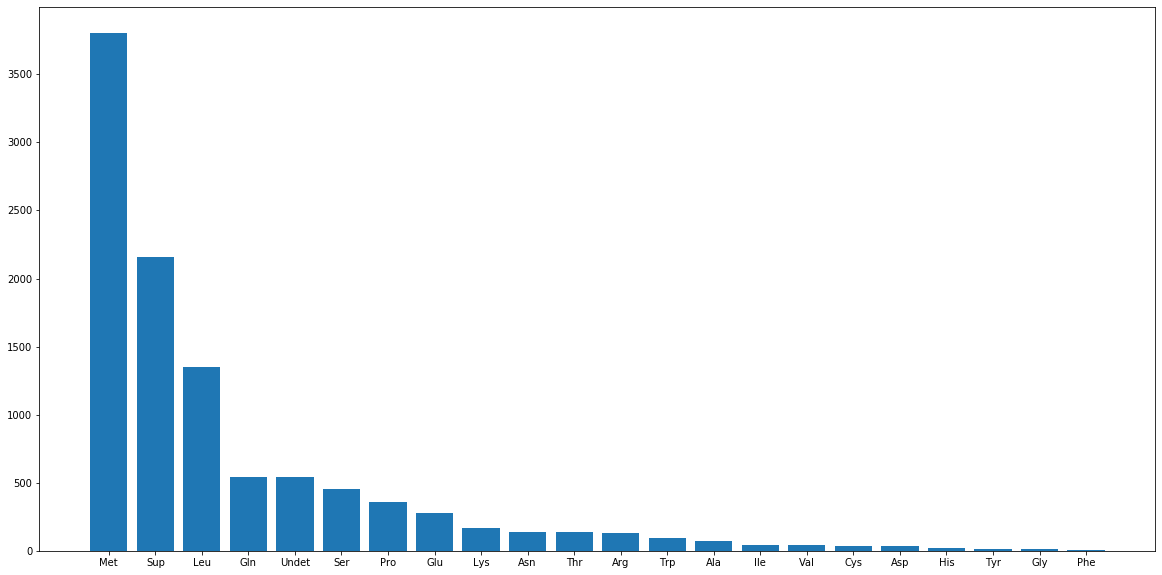

In [261]:
plt.bar(range(22),y,tick_label=y.index)


In [262]:
#quickly create graphs for presentation about old false positive

numbers=[4668,3565,3307,4715]
char=["C","G","A","T"]

<BarContainer object of 4 artists>

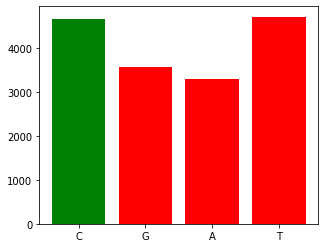

In [272]:
plt.bar(range(4),numbers,tick_label=char,color=("green","red","red","red"))


In [280]:
df1str=ff.to_csv(sep="\t",index=False)
f= open("all_WGS_ribo_trna_v2.csv","w+")
f.write(df1str)
f.close()